In [1]:
# PCA

### import necessary libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Import the dataset

In [7]:
df = sns.load_dataset('iris')

In [8]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
df.shape

(150, 5)

In [10]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

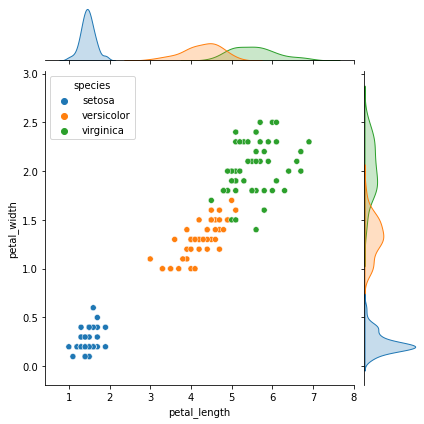

In [11]:
sns.jointplot(x='petal_length', y='petal_width', data=df, hue='species')

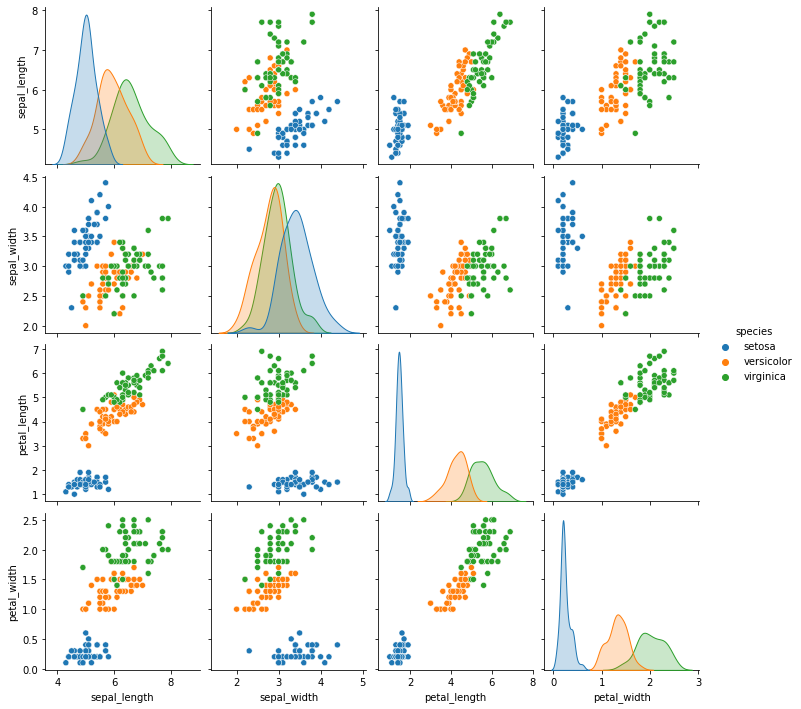

In [12]:
sns.pairplot(df, hue='species')

### Build the PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA()

In [16]:
x = df.drop('species', axis = 1)
y = df['species']

In [17]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Normalization

In [50]:
z = pd.DataFrame({'num':[12,16,5,3,8,2,7]})

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()

In [53]:
z_new = scaler.fit_transform(z)

In [56]:
z_new

array([[0.71428571],
       [1.        ],
       [0.21428571],
       [0.07142857],
       [0.42857143],
       [0.        ],
       [0.35714286]])

In [58]:
(12 - 2) / (16 - 2)

0.7142857142857143

In [64]:
x_new = scaler.fit_transform(x)

In [65]:
x_new = pd.DataFrame(x_new, columns=x.columns)

In [68]:
x_new['species'] = df['species']

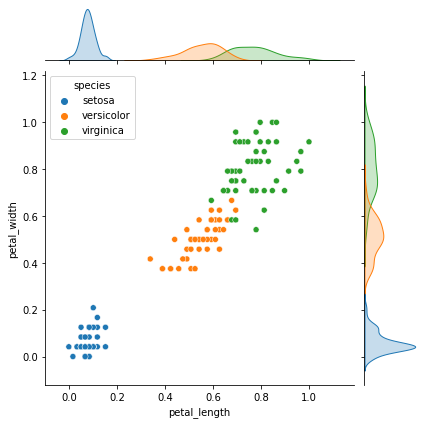

In [70]:
sns.jointplot(x='petal_length', y='petal_width', 
              data=x_new, hue='species')

### Standardization

In [72]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [73]:
z = pd.DataFrame({'num':[12,16,5,3,8,2,7]})

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()

In [76]:
x_std = scaler.fit_transform(z)

In [77]:
x_std

array([[ 0.9575932 ],
       [ 1.82251609],
       [-0.55602186],
       [-0.9884833 ],
       [ 0.09267031],
       [-1.20471402],
       [-0.12356041]])

In [78]:
x_std.std()

0.9999999999999999

In [81]:
(5 - z.mean()) / z.std()

num   -0.514776
dtype: float64

In [82]:
x_std = scaler.fit_transform(x)

In [83]:
x_std = pd.DataFrame(x_std, columns=x.columns)

In [84]:
x_std.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [85]:
x_std['species'] = df['species']

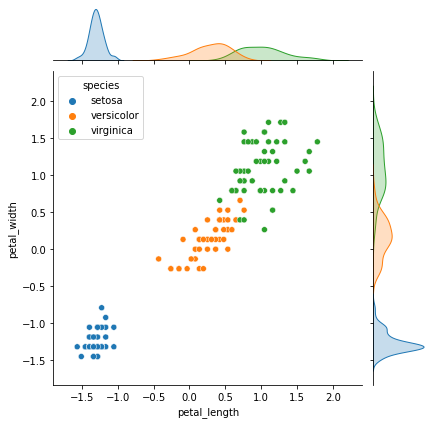

In [86]:
sns.jointplot(x='petal_length', y='petal_width', 
              data=x_std, hue='species')

In [87]:
pca = PCA()

In [88]:
x = x_std.drop('species', axis = 1)

In [89]:
x_pca = pca.fit_transform(x)

In [91]:
x_pca.shape

(150, 4)

In [93]:
pca.explained_variance_ratio_ * 100

array([72.96244541, 22.85076179,  3.66892189,  0.51787091])

<BarContainer object of 4 artists>

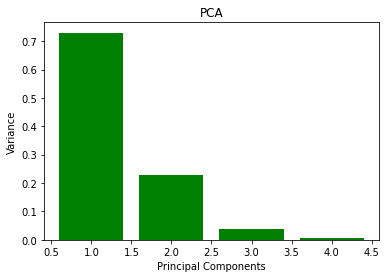

In [95]:
plt.title('PCA')
plt.xlabel('Principal Components')
plt.ylabel('Variance')
plt.bar(range(1,5), pca.explained_variance_ratio_, color='g')

In [96]:
pca = PCA(n_components=2)

In [97]:
x_pca = pca.fit_transform(x)

In [98]:
x_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [99]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [100]:
x_pca = pd.DataFrame(x_pca)
x_pca['species'] = df['species']

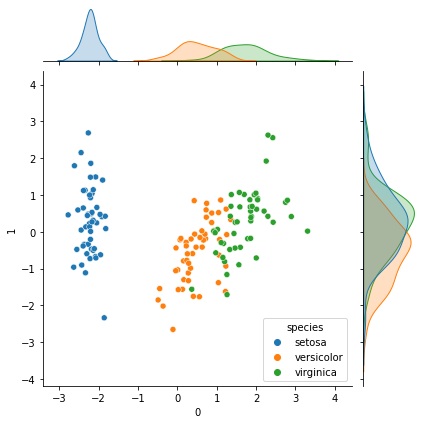

In [102]:
sns.jointplot(x=0, y=1, hue='species', data=x_pca)